In [1]:
#Importing Libraries 
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/Dataset2/main/temperature.csv')
df.head()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


In [3]:
#checking shape
df.shape

(7752, 25)

In [4]:
#there are 7725 rows and 25 columns

In [5]:
#checking the datatype of each column 
print(df.dtypes)

station             float64
Date                 object
Present_Tmax        float64
Present_Tmin        float64
LDAPS_RHmin         float64
LDAPS_RHmax         float64
LDAPS_Tmax_lapse    float64
LDAPS_Tmin_lapse    float64
LDAPS_WS            float64
LDAPS_LH            float64
LDAPS_CC1           float64
LDAPS_CC2           float64
LDAPS_CC3           float64
LDAPS_CC4           float64
LDAPS_PPT1          float64
LDAPS_PPT2          float64
LDAPS_PPT3          float64
LDAPS_PPT4          float64
lat                 float64
lon                 float64
DEM                 float64
Slope               float64
Solar radiation     float64
Next_Tmax           float64
Next_Tmin           float64
dtype: object


In [6]:
#All columns are of float type except date which is a object type data.

In [7]:
#checking for null values
df.isnull().sum()

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

In [8]:
# there are very few null values, we will drop all the rows with null values.

In [9]:
#droping null values
df.dropna(inplace=True)

In [10]:
#checking for null values
df.isnull().sum()

station             0
Date                0
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
dtype: int64

In [12]:
df["Year"] = pd.to_datetime(df.Date, format="%d-%m-%Y").dt.year

In [13]:
df["Month"] = pd.to_datetime(df.Date, format="%d-%m-%Y").dt.month

In [14]:
df["Day"] = pd.to_datetime(df.Date, format="%d-%m-%Y").dt.day

In [15]:
df.head()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,Year,Month,Day
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2,2013,6,30
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5,2013,6,30
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9,2013,6,30
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3,2013,6,30
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5,2013,6,30


In [16]:
df['Day'].value_counts()

30    366
27    250
19    250
16    249
1     249
17    249
21    249
8     249
4     248
28    248
15    248
22    248
7     248
29    248
3     247
14    247
26    247
9     247
12    247
11    246
2     246
18    246
5     246
25    245
13    245
24    245
23    245
6     244
20    225
10    222
31     99
Name: Day, dtype: int64

In [17]:
df['Year'].value_counts()

2014    1547
2015    1533
2013    1510
2017    1506
2016    1492
Name: Year, dtype: int64

In [18]:
df['Month'].value_counts()

7    3820
8    3652
6     116
Name: Month, dtype: int64

In [19]:
df.drop(['Date'],axis=1,inplace=True)

# EDA

In [22]:
#creating a histogram function
def histogram(data_frame,feature_name):
    plt.figure(figsize=(8,4))
    sn.set(style = "whitegrid")
    sn.distplot(data_frame[feature_name],kde=True)

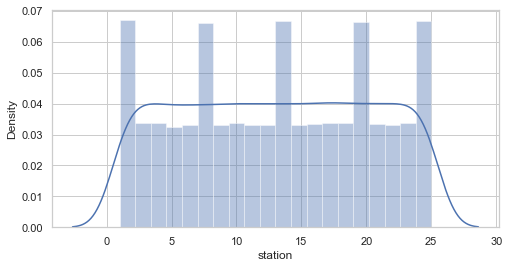

In [23]:
#station
histogram(df,"station")

In [24]:
#the station ranges from 0 to 25.there are 5 station which frequency is double than others

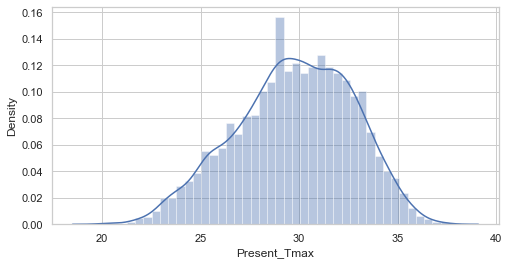

In [25]:
#Present_Tmax
histogram(df,"Present_Tmax")

In [26]:
#the data is left skewed. 

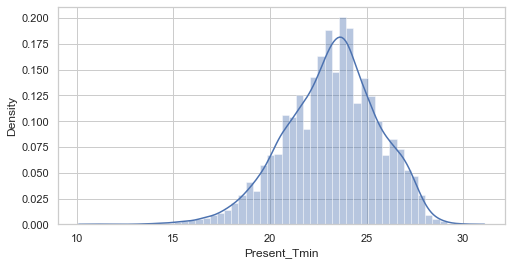

In [27]:
#Present_Tmin
histogram(df,"Present_Tmin")

In [28]:
#the data is left skewed.

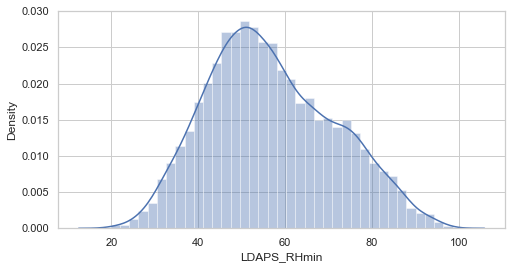

In [29]:
#LDAPS_RHmin
histogram(df,"LDAPS_RHmin")

In [31]:
#the data is right skwed. and has maximum value if 100

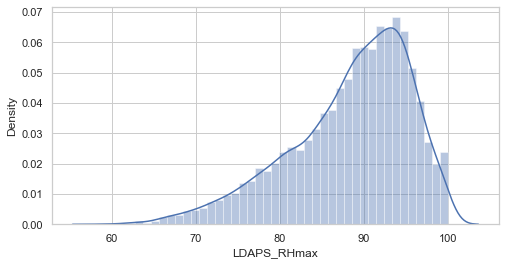

In [30]:
#LDAPS_RHmax
histogram(df,"LDAPS_RHmax")

In [32]:
#the data is left skwed with value ranges from 60 to 100.

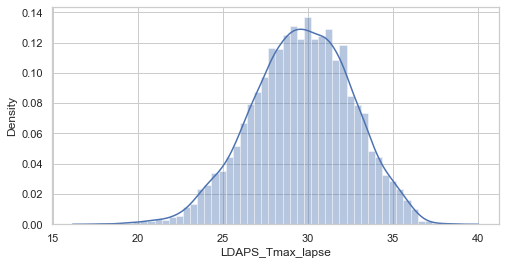

In [33]:
#LDAPS_Tmax_lapse
histogram(df,"LDAPS_Tmax_lapse")

In [34]:
#the data is normally distributed

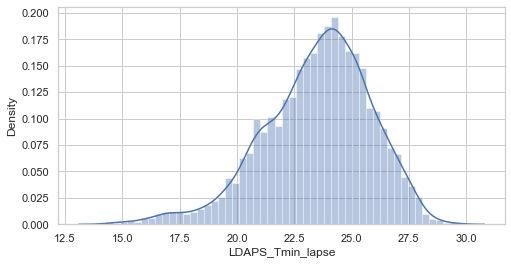

In [35]:
#LDAPS_Tmin_lapse
histogram(df,"LDAPS_Tmin_lapse")

In [36]:
#the data is also normally distributed.

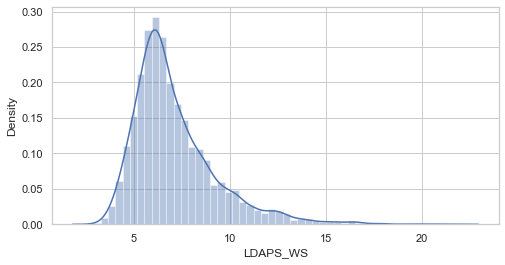

In [37]:
#LDAPS_WS
histogram(df,"LDAPS_WS")

In [38]:
#the data is right skewed.

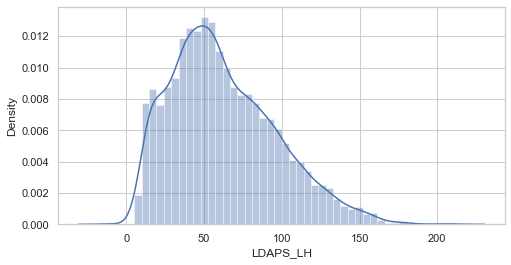

In [39]:
#LDAPS_LH
histogram(df,"LDAPS_LH")

In [40]:
#the data is right skewed

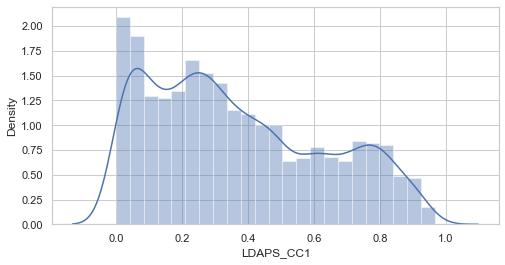

In [41]:
#LDAPS_CC1
histogram(df,"LDAPS_CC1")

In [42]:
#the data is right skewed

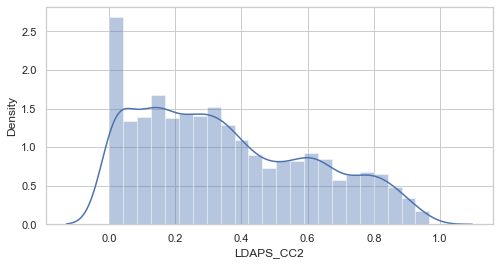

In [43]:
#LDAPS_CC2
histogram(df,"LDAPS_CC2")

In [44]:
#the data is right skwed

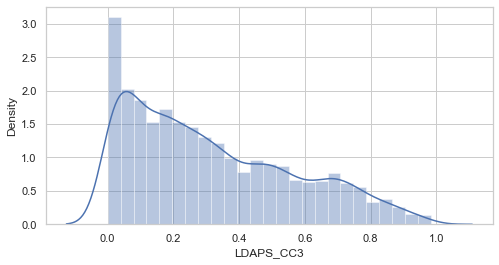

In [45]:
#LDAPS_CC3
histogram(df,"LDAPS_CC3")

In [46]:
#the data is right skwed

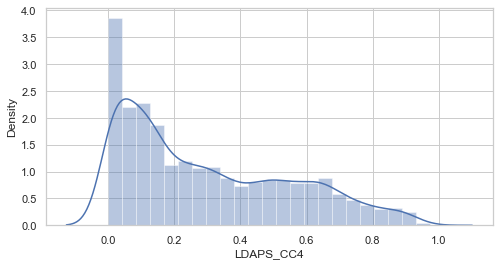

In [47]:
#LDAPS_CC4
histogram(df,"LDAPS_CC4")

In [48]:
#the data is right skewed

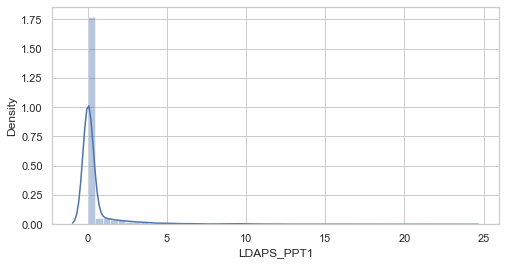

In [49]:
#LDAPS_PPT1
histogram(df,"LDAPS_PPT1")

In [50]:
#the data is right skewed
#also the data is huge outliers
#most of the value of this variable is 0

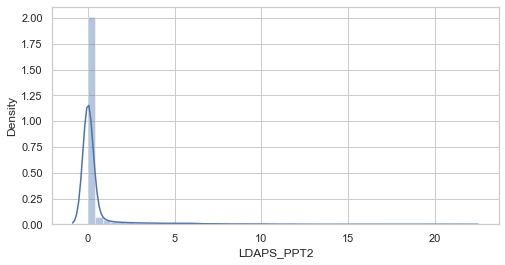

In [51]:
#LDAPS_PPT2
histogram(df,"LDAPS_PPT2")

In [52]:
#the data is right skewed
#also the data is huge outliers
#most of the value of this variable is 0

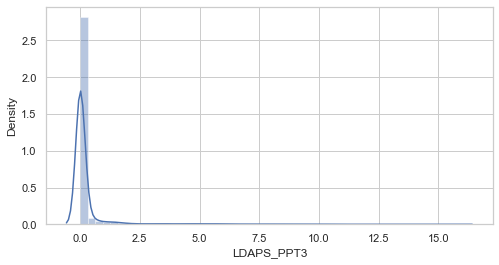

In [53]:
#LDAPS_PPT3
histogram(df,"LDAPS_PPT3")

In [54]:
#the data is right skewed
#also the data is huge outliers
#most of the value of this variable is 0

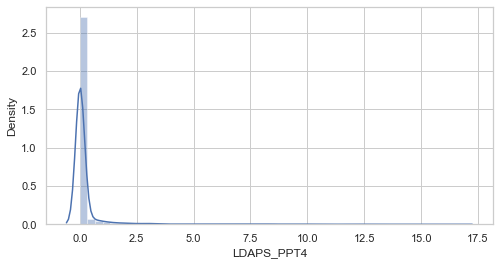

In [55]:
#LDAPS_PPT4
histogram(df,"LDAPS_PPT4")

In [56]:
#the data is right skewed
#also the data is huge outliers
#most of the value of this variable is 0

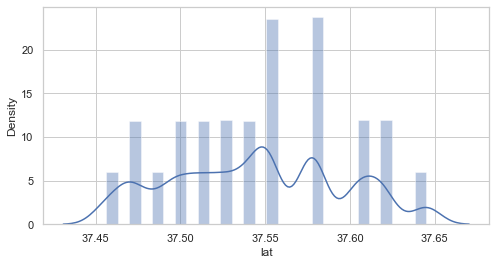

In [57]:
#lat
histogram(df,"lat")

In [58]:
#37.55 and 37.60 has the highest frequency while 37.45 and 37.65 has least.

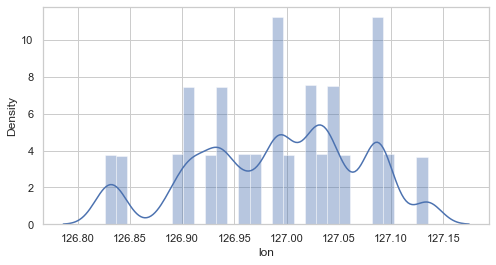

In [59]:
#lon
histogram(df,"lon")

In [62]:
#2 of the values has most frequency

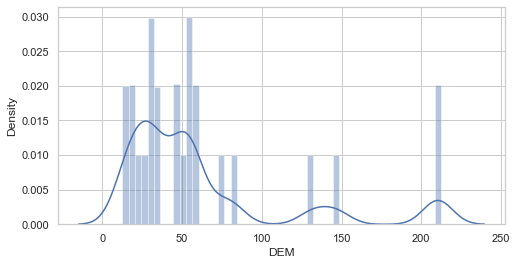

In [63]:
#DEM
histogram(df,"DEM")

In [64]:
#most of the values lies between 0 to 50, howver the variable has soem outliers

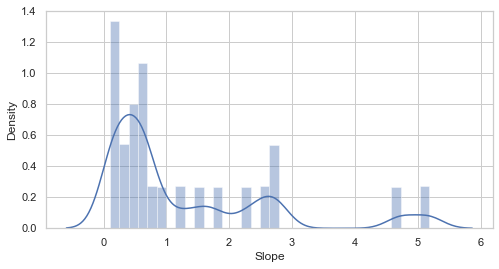

In [65]:
#Slope
histogram(df,"Slope")

In [66]:
#most of the frequency lies between 0 to ,
#the dataset is highly skewed 
#the variable has huge outliers

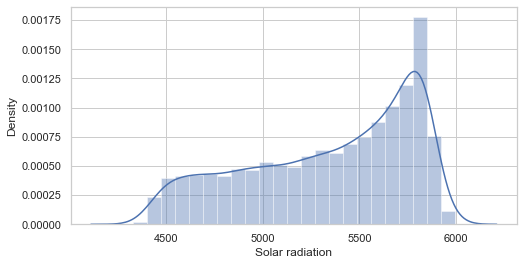

In [67]:
#Solar radiation
histogram(df,"Solar radiation")

In [69]:
#the range of the data is 4500 to 6000
#the data is left skewed

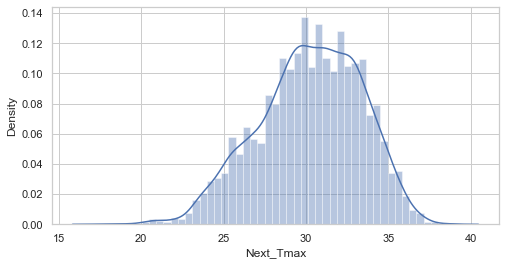

In [70]:
#Next_Tmax
histogram(df,"Next_Tmax")

In [71]:
#there is some skweness in the variable

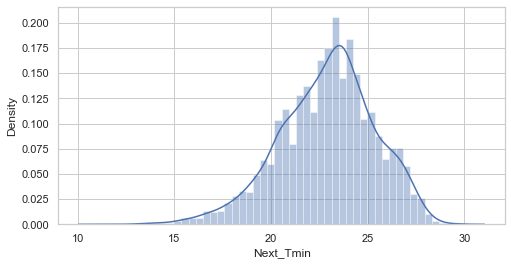

In [72]:
#Next_Tmin
histogram(df,"Next_Tmin")

In [73]:
#there is some skweness in the variable

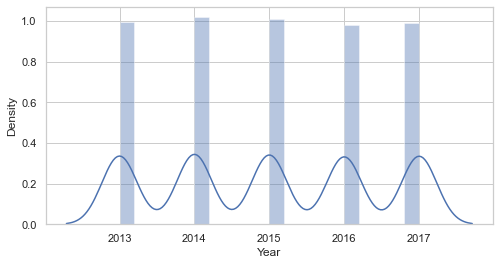

In [75]:
#year
histogram(df,"Year")

In [76]:
#the data is from year 2013 to 2017.

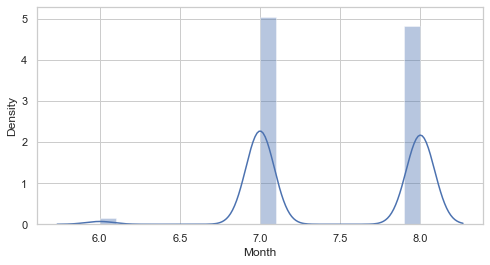

In [78]:
#month
histogram(df,"Month")

In [79]:
#7th, 8th month data contains highest frequency

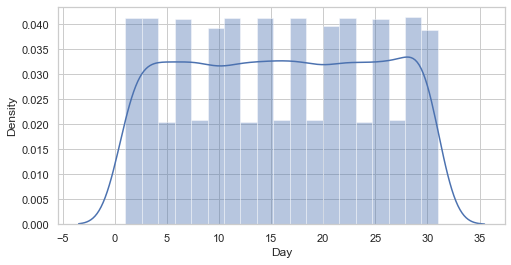

In [80]:
#Day
histogram(df,"Day")

In [81]:
#the data in the first week of the moth has highest frequency

# Bivariate Analysis

In [116]:
#creating list for bivariate analysis
feature=['station', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin', 'LDAPS_RHmax',
       'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS', 'LDAPS_LH',
       'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4', 'LDAPS_PPT1',
       'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon', 'DEM', 'Slope',
       'Solar radiation', 'Year', 'Month', 'Day']

In [117]:
list(enumerate(feature))

[(0, 'station'),
 (1, 'Present_Tmax'),
 (2, 'Present_Tmin'),
 (3, 'LDAPS_RHmin'),
 (4, 'LDAPS_RHmax'),
 (5, 'LDAPS_Tmax_lapse'),
 (6, 'LDAPS_Tmin_lapse'),
 (7, 'LDAPS_WS'),
 (8, 'LDAPS_LH'),
 (9, 'LDAPS_CC1'),
 (10, 'LDAPS_CC2'),
 (11, 'LDAPS_CC3'),
 (12, 'LDAPS_CC4'),
 (13, 'LDAPS_PPT1'),
 (14, 'LDAPS_PPT2'),
 (15, 'LDAPS_PPT3'),
 (16, 'LDAPS_PPT4'),
 (17, 'lat'),
 (18, 'lon'),
 (19, 'DEM'),
 (20, 'Slope'),
 (21, 'Solar radiation'),
 (22, 'Year'),
 (23, 'Month'),
 (24, 'Day')]

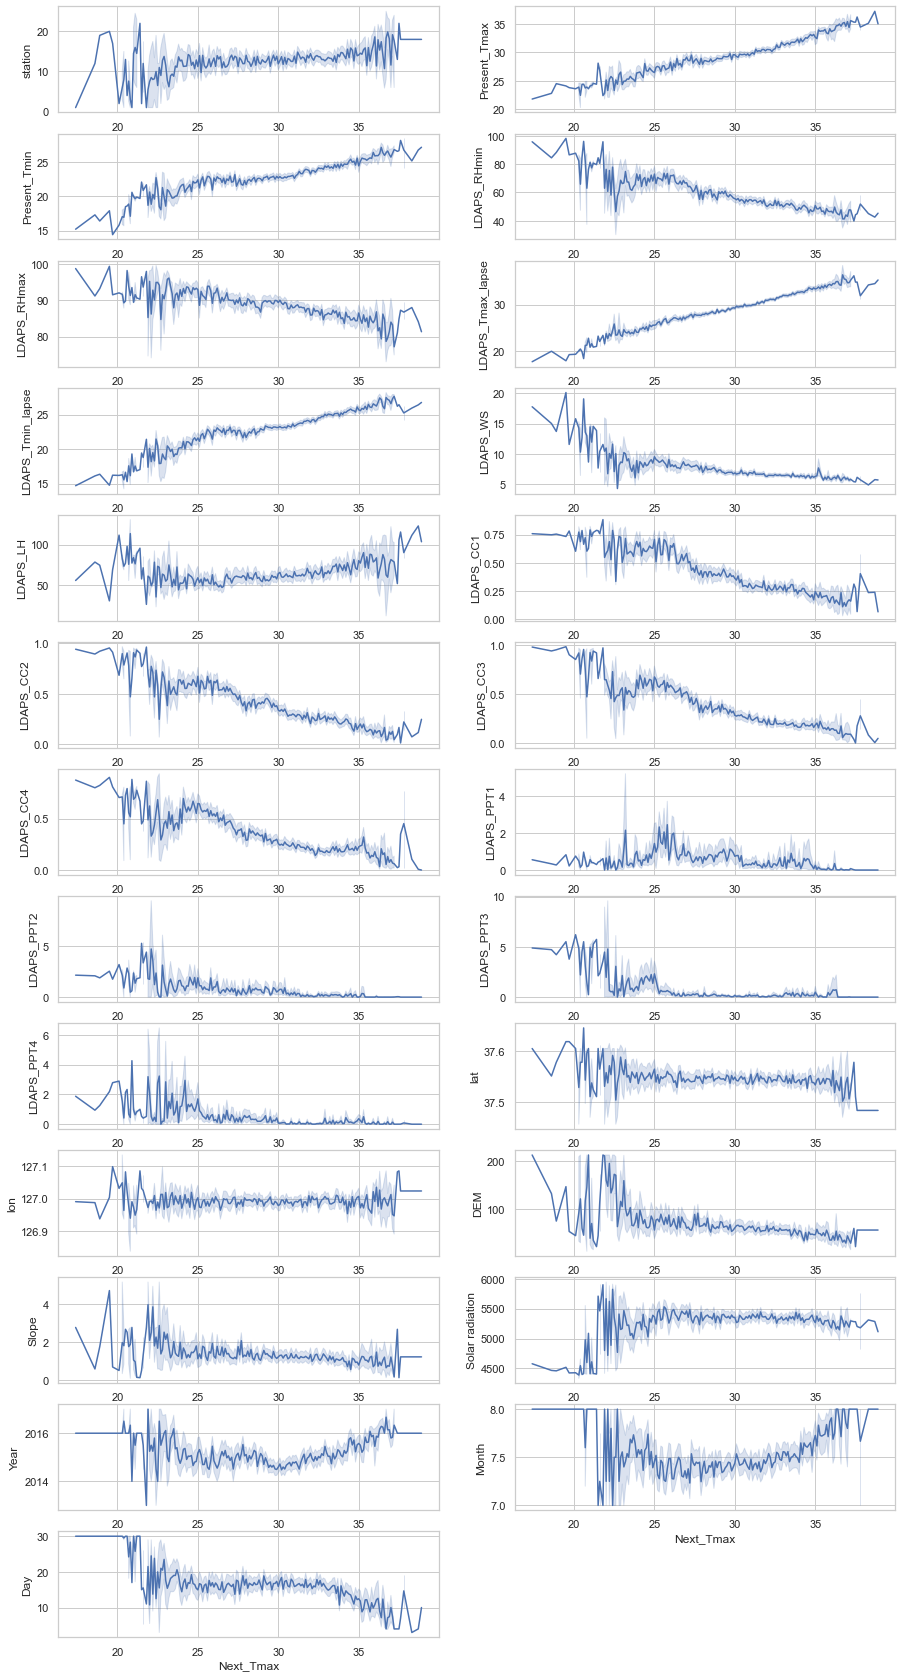

In [118]:
#bivariate analysis "Next_Tmax"
plt.figure(figsize=(15,30))
for i in enumerate(feature):
    plt.subplot(13,2,i[0]+1)
    sn.lineplot(x="Next_Tmax",y=i[1],data=df)

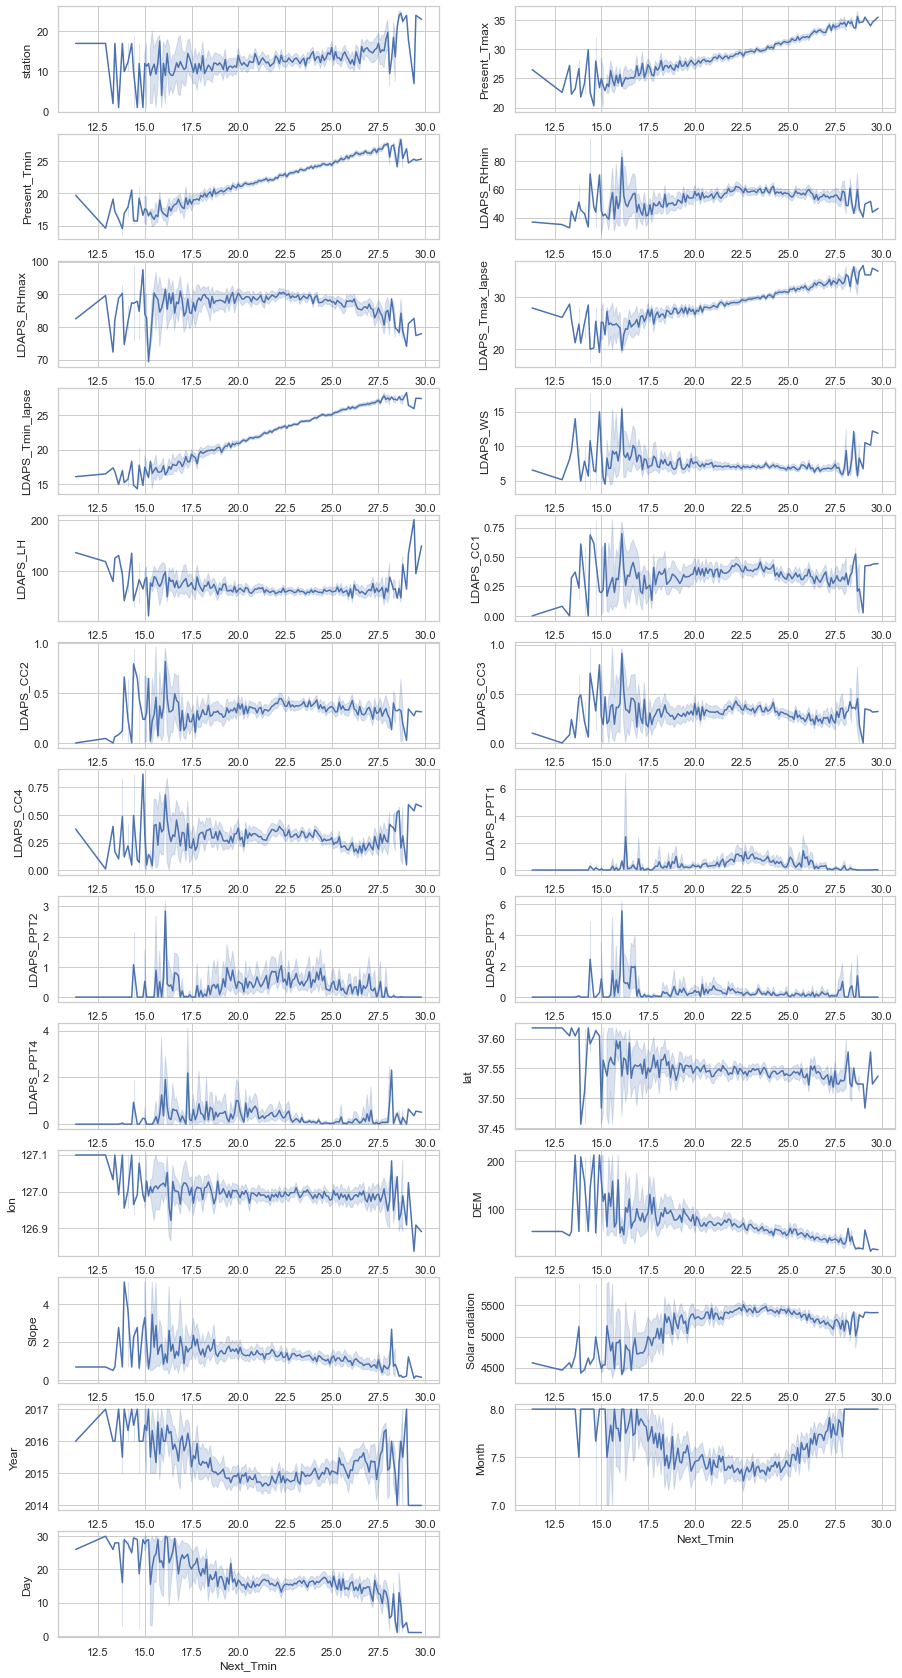

In [119]:
#bivariate analysis Next_Tmin
plt.figure(figsize=(15,30))
for i in enumerate(feature):
    plt.subplot(13,2,i[0]+1)
    sn.lineplot(x="Next_Tmin",y=i[1],data=df)

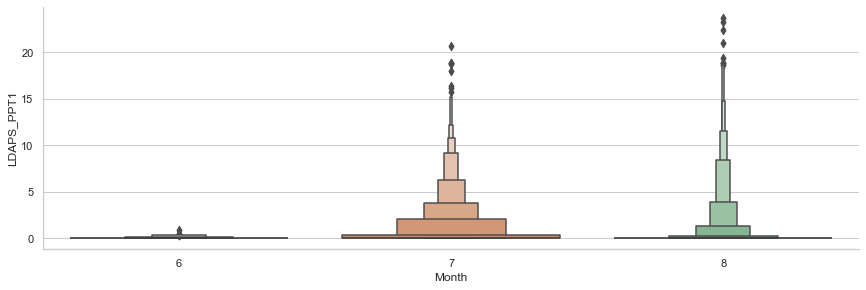

In [82]:
sn.catplot(y = "LDAPS_PPT1", x = "Month", data = df.sort_values("LDAPS_PPT1", ascending = False), kind="boxen", height = 4, aspect = 3)
plt.show()

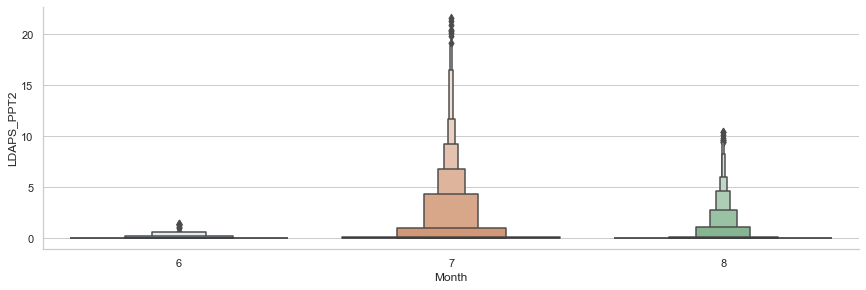

In [83]:
sn.catplot(y = "LDAPS_PPT2", x = "Month", data = df.sort_values("LDAPS_PPT2", ascending = False), kind="boxen", height = 4, aspect = 3)
plt.show()

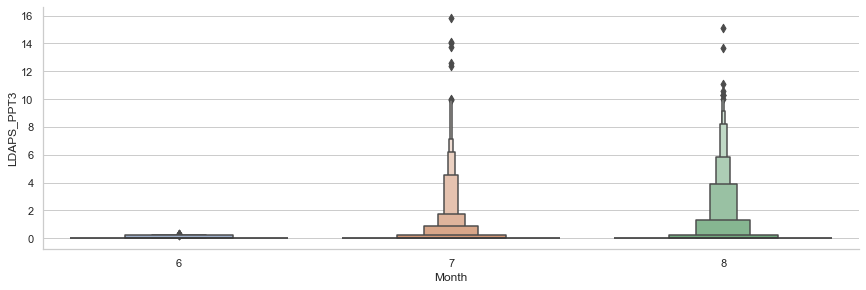

In [84]:
sn.catplot(y = "LDAPS_PPT3", x = "Month", data = df.sort_values("LDAPS_PPT3", ascending = False), kind="boxen", height = 4, aspect = 3)
plt.show()

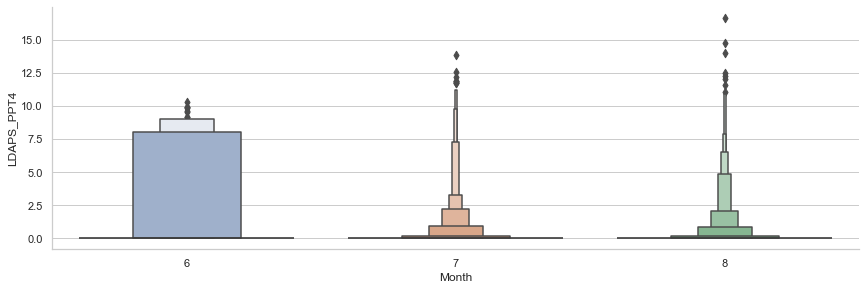

In [85]:
sn.catplot(y = "LDAPS_PPT4", x = "Month", data = df.sort_values("LDAPS_PPT4", ascending = False), kind="boxen", height = 4, aspect = 3)
plt.show()

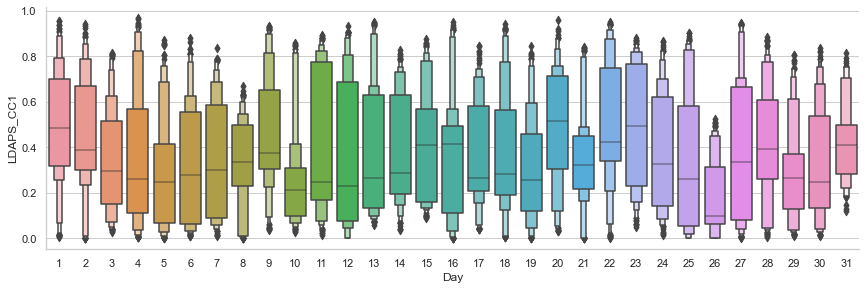

In [86]:
sn.catplot(y = "LDAPS_CC1", x = "Day", data = df.sort_values("LDAPS_CC1", ascending = False), kind="boxen", height = 4, aspect = 3)
plt.show()

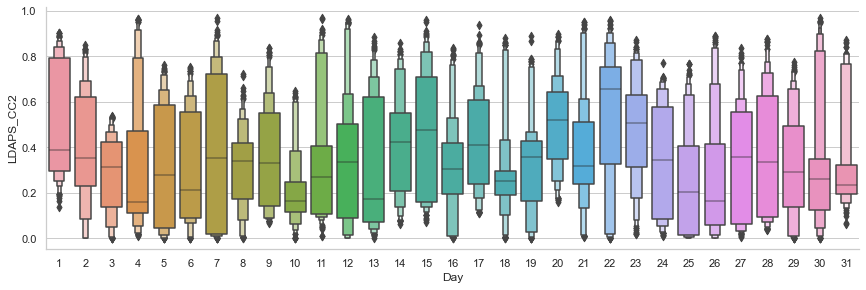

In [87]:
sn.catplot(y = "LDAPS_CC2", x = "Day", data = df.sort_values("LDAPS_CC2", ascending = False), kind="boxen", height = 4, aspect = 3)
plt.show()

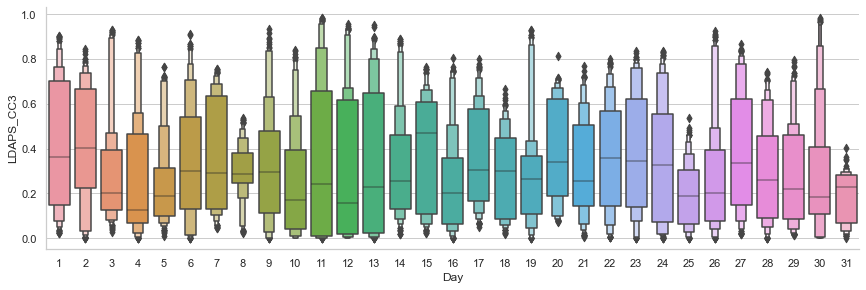

In [88]:
sn.catplot(y = "LDAPS_CC3", x = "Day", data = df.sort_values("LDAPS_CC3", ascending = False), kind="boxen", height = 4, aspect = 3)
plt.show()

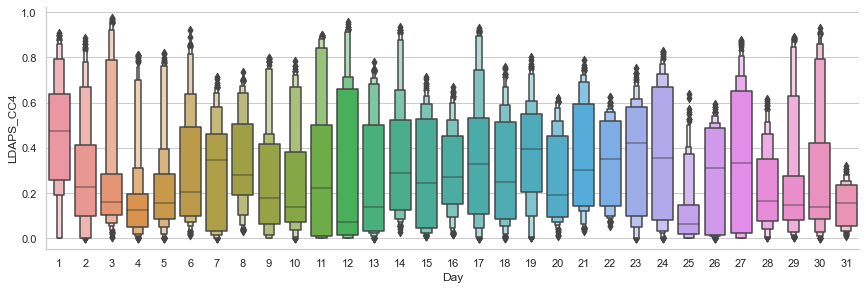

In [89]:
sn.catplot(y = "LDAPS_CC4", x = "Day", data = df.sort_values("LDAPS_CC4", ascending = False), kind="boxen", height = 4, aspect = 3)
plt.show()


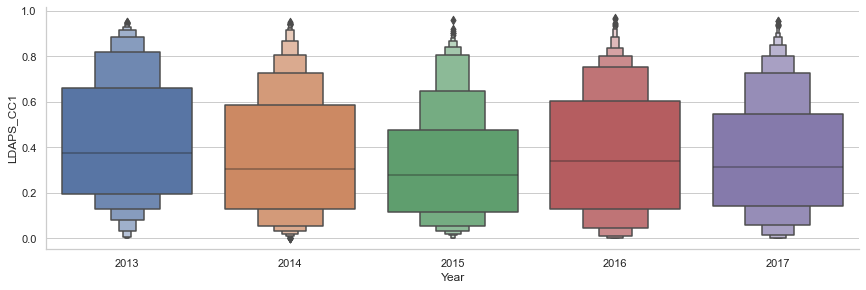

In [90]:
sn.catplot(y = "LDAPS_CC1", x = "Year", data = df.sort_values("LDAPS_CC4", ascending = False), kind="boxen", height = 4, aspect = 3)
plt.show()

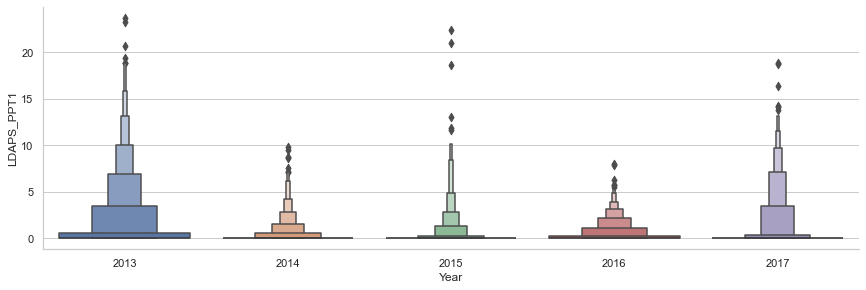

In [91]:
sn.catplot(y = "LDAPS_PPT1", x = "Year", data = df.sort_values("LDAPS_PPT1", ascending = False), kind="boxen", height = 4, aspect = 3)
plt.show()

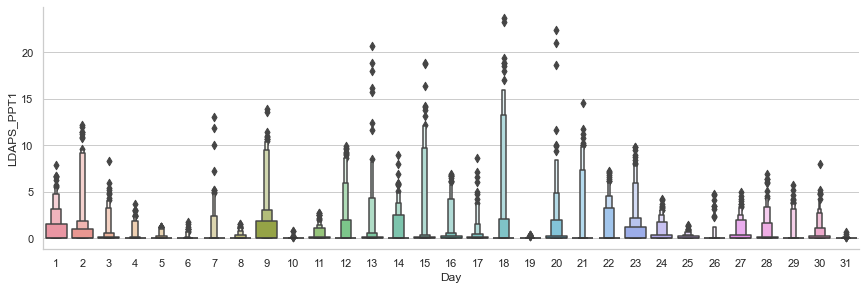

In [92]:
sn.catplot(y = "LDAPS_PPT1", x = "Day", data = df.sort_values("LDAPS_PPT1", ascending = False), kind="boxen", height = 4, aspect = 3)
plt.show()

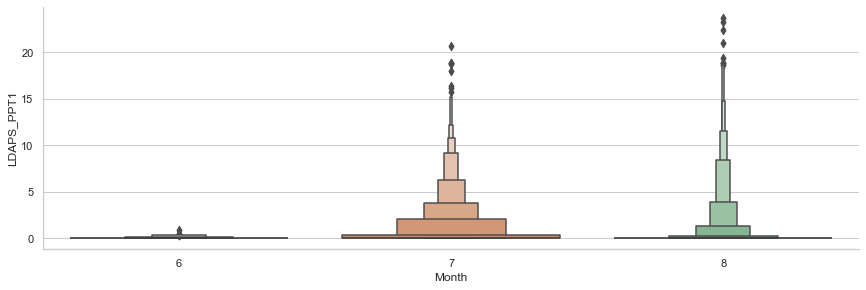

In [93]:
sn.catplot(y = "LDAPS_PPT1", x = "Month", data = df.sort_values("LDAPS_PPT1", ascending = False), kind="boxen", height = 4, aspect = 3)
plt.show()

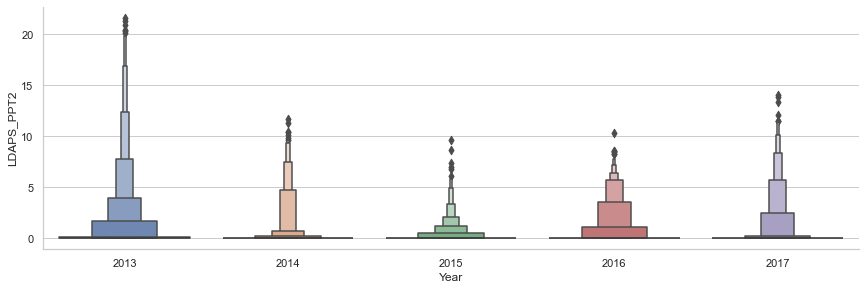

In [94]:
sn.catplot(y = "LDAPS_PPT2", x = "Year", data = df.sort_values("LDAPS_PPT2", ascending = False), kind="boxen", height = 4, aspect = 3)
plt.show()

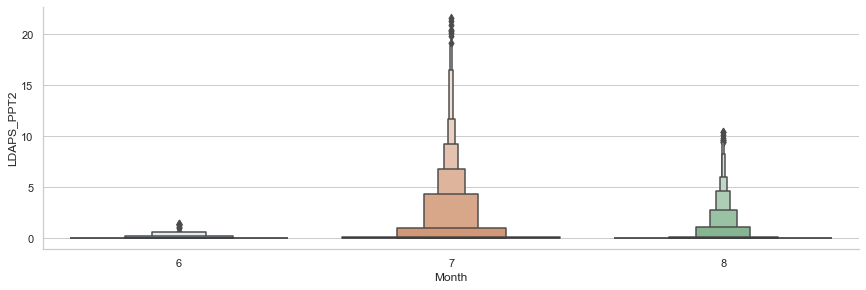

In [96]:
sn.catplot(y = "LDAPS_PPT2", x = "Month", data = df.sort_values("LDAPS_PPT2", ascending = False), kind="boxen", height = 4, aspect = 3)
plt.show()

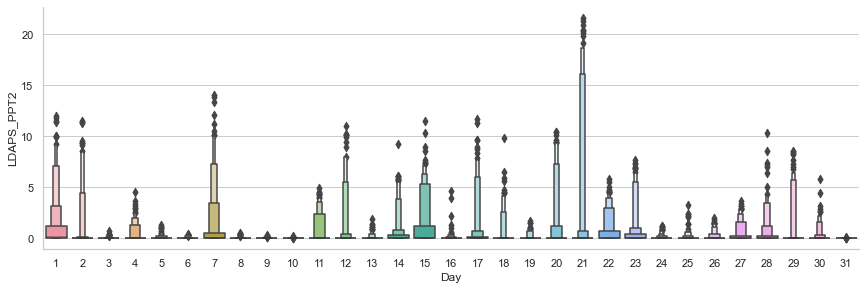

In [97]:
sn.catplot(y = "LDAPS_PPT2", x = "Day", data = df.sort_values("LDAPS_PPT2", ascending = False), kind="boxen", height = 4, aspect = 3)
plt.show()

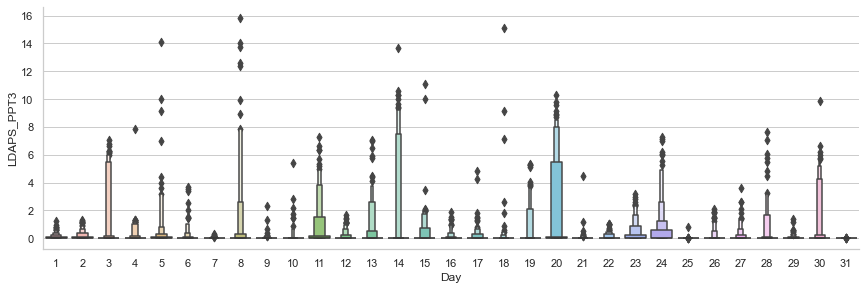

In [98]:
sn.catplot(y = "LDAPS_PPT3", x = "Day", data = df.sort_values("LDAPS_PPT3", ascending = False), kind="boxen", height = 4, aspect = 3)
plt.show()

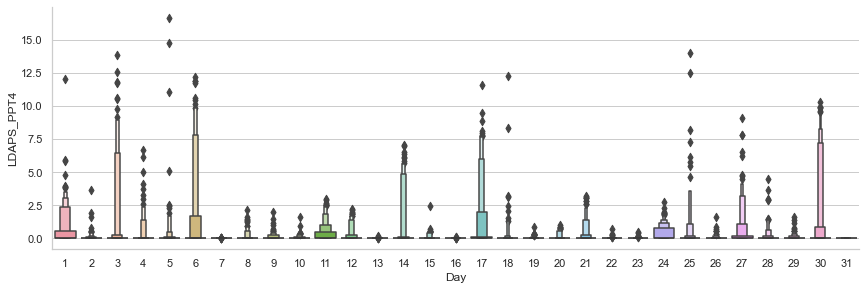

In [99]:
sn.catplot(y = "LDAPS_PPT4", x = "Day", data = df.sort_values("LDAPS_PPT4", ascending = False), kind="boxen", height = 4, aspect = 3)
plt.show()

<AxesSubplot:xlabel='Year', ylabel='LDAPS_RHmin'>

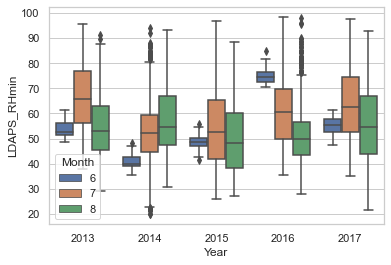

In [102]:
plt.subplots(figsize=(6,4))
sn.boxplot(x='Year',y='LDAPS_RHmin',hue='Month',data=df)

<AxesSubplot:xlabel='Year', ylabel='LDAPS_RHmax'>

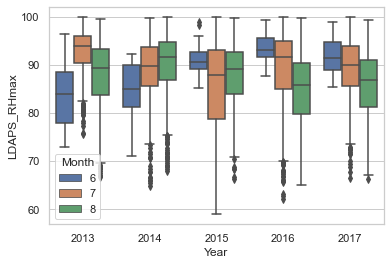

In [101]:
plt.subplots(figsize=(6,4))
sn.boxplot(x='Year',y='LDAPS_RHmax',hue='Month',data=df)

<AxesSubplot:xlabel='Year', ylabel='LDAPS_Tmax_lapse'>

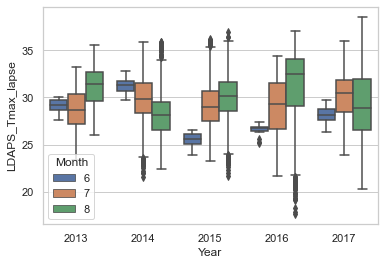

In [103]:
plt.subplots(figsize=(6,4))
sn.boxplot(x='Year',y='LDAPS_Tmax_lapse',hue='Month',data=df)

<AxesSubplot:xlabel='Year', ylabel='LDAPS_Tmin_lapse'>

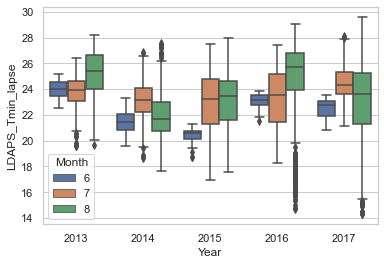

In [104]:
plt.subplots(figsize=(6,4))
sn.boxplot(x='Year',y='LDAPS_Tmin_lapse',hue='Month',data=df)

<AxesSubplot:xlabel='Year', ylabel='LDAPS_LH'>

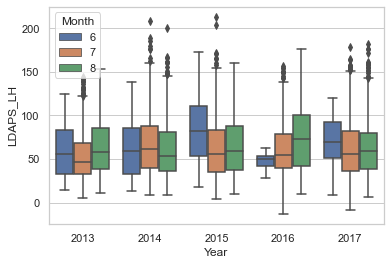

In [105]:
plt.subplots(figsize=(6,4))
sn.boxplot(x='Year',y='LDAPS_LH',hue='Month',data=df)

<AxesSubplot:xlabel='Year', ylabel='LDAPS_WS'>

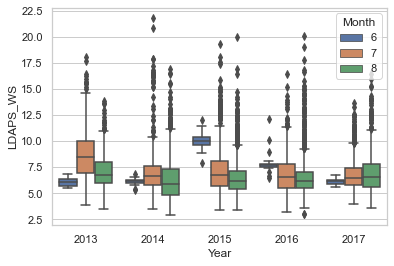

In [106]:
plt.subplots(figsize=(6,4))
sn.boxplot(x='Year',y='LDAPS_WS',hue='Month',data=df)

# Check Oultiers

station                 AxesSubplot(0.125,0.71587;0.0824468x0.16413)
Present_Tmax         AxesSubplot(0.223936,0.71587;0.0824468x0.16413)
Present_Tmin         AxesSubplot(0.322872,0.71587;0.0824468x0.16413)
LDAPS_RHmin          AxesSubplot(0.421809,0.71587;0.0824468x0.16413)
LDAPS_RHmax          AxesSubplot(0.520745,0.71587;0.0824468x0.16413)
LDAPS_Tmax_lapse     AxesSubplot(0.619681,0.71587;0.0824468x0.16413)
LDAPS_Tmin_lapse     AxesSubplot(0.718617,0.71587;0.0824468x0.16413)
LDAPS_WS             AxesSubplot(0.817553,0.71587;0.0824468x0.16413)
LDAPS_LH               AxesSubplot(0.125,0.518913;0.0824468x0.16413)
LDAPS_CC1           AxesSubplot(0.223936,0.518913;0.0824468x0.16413)
LDAPS_CC2           AxesSubplot(0.322872,0.518913;0.0824468x0.16413)
LDAPS_CC3           AxesSubplot(0.421809,0.518913;0.0824468x0.16413)
LDAPS_CC4           AxesSubplot(0.520745,0.518913;0.0824468x0.16413)
LDAPS_PPT1          AxesSubplot(0.619681,0.518913;0.0824468x0.16413)
LDAPS_PPT2          AxesSubplot(0.

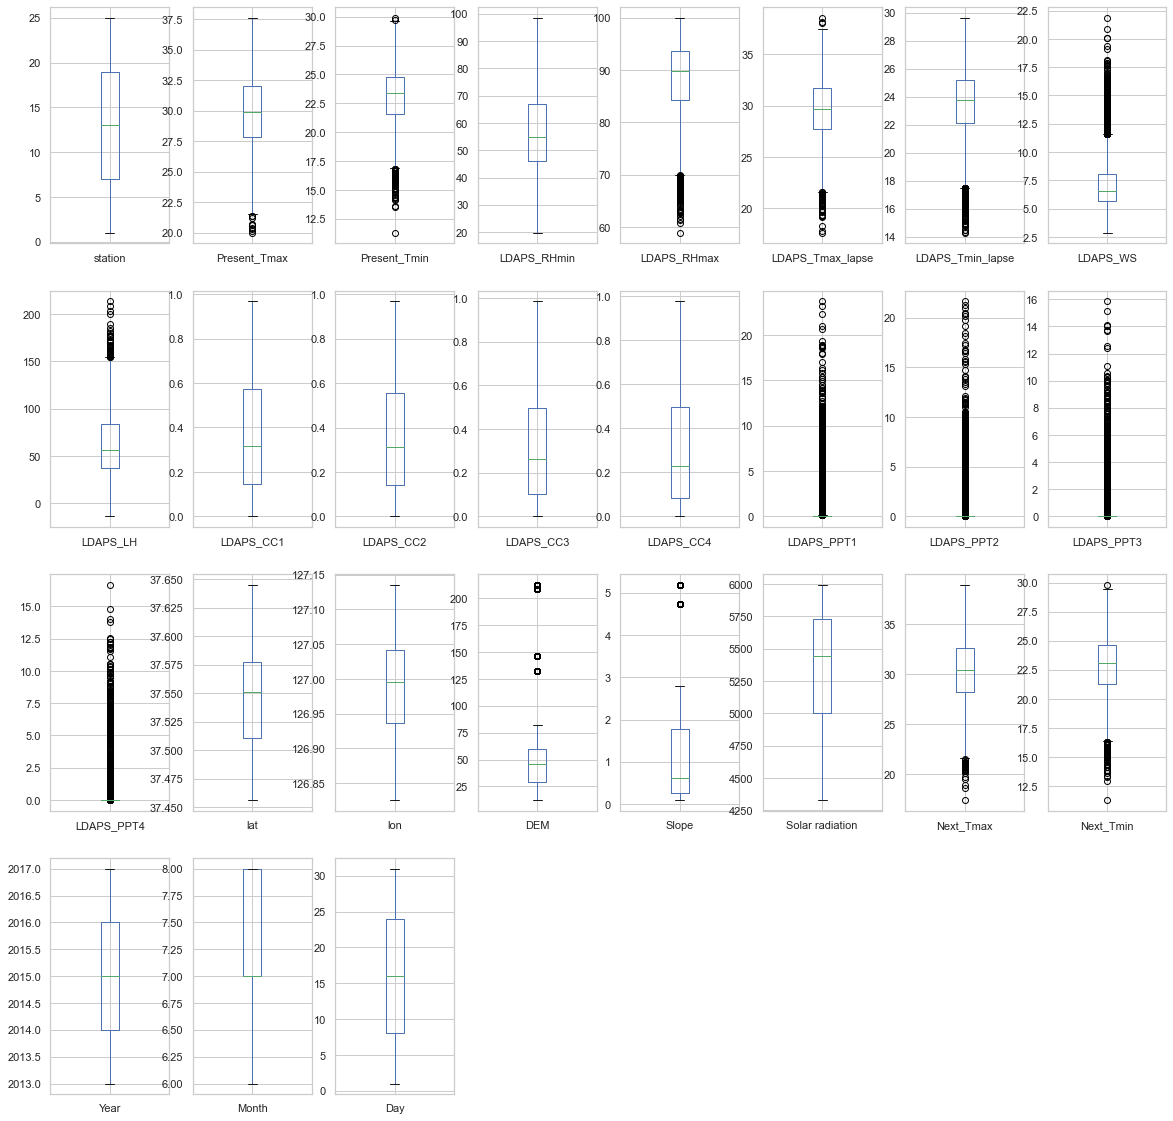

In [107]:
df.plot(kind='box',subplots=True,layout=(4,8),figsize=(20,20))

In [108]:
#There are outliers in nearly all the columns.

# Statistical Analysis

In [109]:
df.describe()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,Year,Month,Day
count,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,...,7588.000000,7588.00000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000
mean,13.014101,29.748366,23.195809,56.724969,88.360823,29.620128,23.511786,7.094097,62.492606,0.368510,...,37.544792,126.99142,61.918136,1.259755,5343.724208,30.241526,22.910820,2014.991697,7.465999,15.939510
std,7.217858,2.967401,2.400880,14.626559,7.199456,2.943496,2.342579,2.177034,33.686158,0.262260,...,0.050428,0.07922,54.323529,1.372748,429.782561,3.111807,2.482256,1.410877,0.528635,8.906521
min,1.000000,20.000000,11.300000,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000,...,37.456200,126.82600,12.370000,0.098500,4329.520508,17.400000,11.300000,2013.000000,6.000000,1.000000
25%,7.000000,27.800000,21.600000,45.960243,84.203724,27.673756,22.086820,5.675358,37.206201,0.146546,...,37.510200,126.93700,28.700000,0.271300,5001.485717,28.200000,21.300000,2014.000000,7.000000,8.000000
50%,13.000000,29.900000,23.400000,55.023199,89.784122,29.709537,23.758249,6.547838,56.898324,0.315706,...,37.550700,126.99500,45.716000,0.618000,5441.987305,30.400000,23.100000,2015.000000,7.000000,16.000000
75%,19.000000,32.000000,24.800000,67.115099,93.742725,31.711109,25.155660,8.028960,84.235666,0.574174,...,37.577600,127.04200,59.832400,1.767800,5729.485840,32.600000,24.600000,2016.000000,8.000000,24.000000
max,25.000000,37.600000,29.900000,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,0.967277,...,37.645000,127.13500,212.335000,5.178200,5992.895996,38.900000,29.800000,2017.000000,8.000000,31.000000


From the above analysis we can say that their quite large difference between 75% and max in LDAPS_WS,LDAPS_LH,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4..So many outliers are their in these columns

# Coorelation

<function matplotlib.pyplot.show(close=None, block=None)>

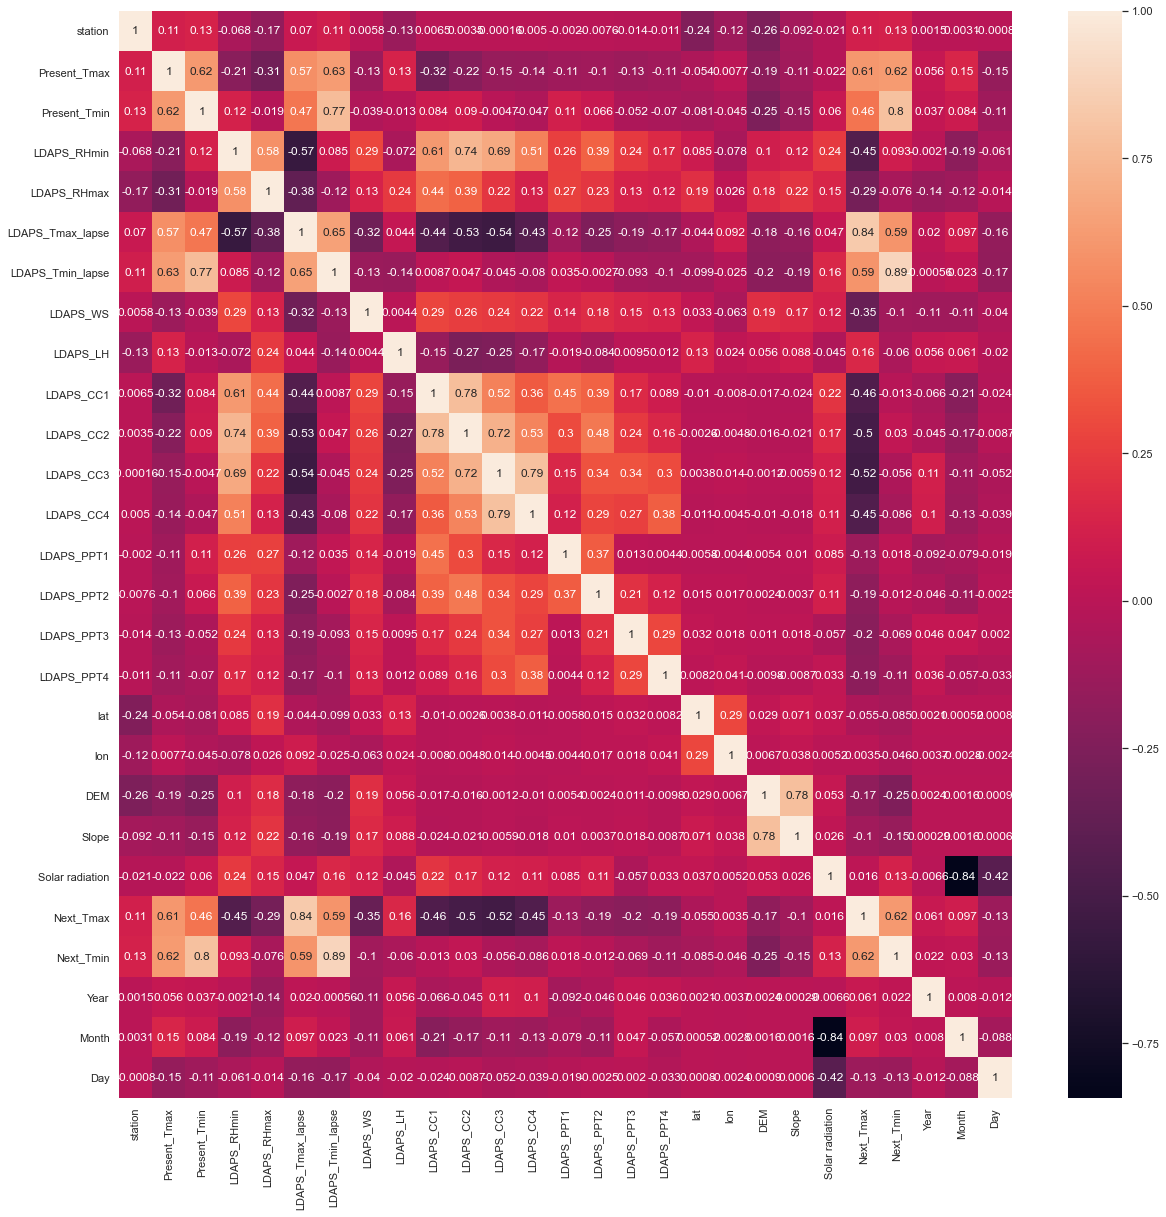

In [111]:
#Observing corelation between the columns through heatmap
plt.figure(figsize=(20,20))
sn.heatmap(df.corr(),annot=True)
plt.show

# Removing Outliers

In [120]:
print("The shape before removing outliers",df.shape)
print("skewness before removing outliers")
print(df.skew())

The shape before removing outliers (7588, 27)
skewness before removing outliers
station            -0.004178
Present_Tmax       -0.257069
Present_Tmin       -0.353822
LDAPS_RHmin         0.301396
LDAPS_RHmax        -0.845264
LDAPS_Tmax_lapse   -0.222349
LDAPS_Tmin_lapse   -0.574035
LDAPS_WS            1.553926
LDAPS_LH            0.662971
LDAPS_CC1           0.456716
LDAPS_CC2           0.473929
LDAPS_CC3           0.639649
LDAPS_CC4           0.663815
LDAPS_PPT1          5.305906
LDAPS_PPT2          5.710360
LDAPS_PPT3          6.356670
LDAPS_PPT4          6.681256
lat                 0.085377
lon                -0.289048
DEM                 1.721617
Slope               1.559050
Solar radiation    -0.524325
Next_Tmax          -0.334842
Next_Tmin          -0.393662
Year                0.013575
Month              -0.174856
Day                -0.010718
dtype: float64


In [123]:
from scipy.stats import zscore
z=np.abs(zscore(df))
df1=df[(z<3).all(axis=1)]
print("New shape after removing outliers",df1.shape)
print("skewness after removing outliers")
print(df1.skew())

New shape after removing outliers (6739, 27)
skewness after removing outliers
station            -0.001594
Present_Tmax       -0.269936
Present_Tmin       -0.221250
LDAPS_RHmin         0.309567
LDAPS_RHmax        -0.686083
LDAPS_Tmax_lapse   -0.110563
LDAPS_Tmin_lapse   -0.379269
LDAPS_WS            1.085685
LDAPS_LH            0.567050
LDAPS_CC1           0.594835
LDAPS_CC2           0.505774
LDAPS_CC3           0.701288
LDAPS_CC4           0.708754
LDAPS_PPT1          3.724580
LDAPS_PPT2          4.854967
LDAPS_PPT3          5.516862
LDAPS_PPT4          5.924324
lat                 0.106983
lon                -0.277547
DEM                 1.764698
Slope               1.590130
Solar radiation    -0.520157
Next_Tmax          -0.267526
Next_Tmin          -0.234328
Year                0.025066
Month              -0.168571
Day                 0.000057
dtype: float64


# Splitting the data into input and target

Taking Next_Tmax as Target Variable

In [124]:
x=df1.drop(['Next_Tmax','Next_Tmin'],axis=1)
y=df1['Next_Tmax']

In [125]:
x.head()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Year,Month,Day
0,1.0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,...,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,2013,6,30
1,2.0,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,...,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,2013,6,30
2,3.0,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,...,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,2013,6,30
3,4.0,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,...,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,2013,6,30
4,5.0,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,...,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,2013,6,30


In [126]:
y.head()

0    29.1
1    30.5
2    31.1
3    31.7
4    31.2
Name: Next_Tmax, dtype: float64

In [127]:
print(x.shape)
print(y.shape)

(6739, 25)
(6739,)


In [128]:
#scaling data 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
print(scaler.fit(x))

StandardScaler()


# Importing libraries

In [129]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV

In [130]:
def maxr2_score(regr,x,y):
    max_r_score=0
    for i in range(42,100):
        x_train,x_test,y_train,y_test=train_test_split(x,y,random_state= i ,test_size=0.20)
        regr.fit(x_train,y_train)
        y_pred=regr.predict(x_test)
        r2_scr=r2_score(y_test,y_pred)
        
        if r2_scr>max_r_score:
            max_r_score=r2_scr
            final_i=i
    print("max r2 score corresponding to",final_i,"is",max_r_score)
    return final_i

In [131]:
lreg=LinearRegression()
i=maxr2_score(lreg,x,y)

max r2 score corresponding to 84 is 0.7907718767912693


In [132]:
print("Mean r2 score for Linear Regression:",cross_val_score(lreg,x,y,cv=5,scoring="r2").mean())
print("Standard deviation in r2 score for Linear Regression",cross_val_score(lreg,x,y,cv=5,scoring="r2").std())

Mean r2 score for Linear Regression: 0.6476002847401754
Standard deviation in r2 score for Linear Regression 0.06008552899802697


# Find best parameter by using GridSearchCV

In [133]:
#KNeighborsRegressor
KNR=KNeighborsRegressor()
parameters={'n_neighbors':range(1,10),'algorithm':['auto', 'ball_tree', 'kd_tree']}
gd=GridSearchCV(KNR,parameters)
gd.fit(x,y)
print(gd.best_params_)
print("\n")

{'algorithm': 'auto', 'n_neighbors': 9}




In [134]:
#DecisionTreeRegressor
DTR=DecisionTreeRegressor()
parameters={'criterion':('mse', 'friedman_mse', 'mae'),'max_features' : ['auto', 'sqrt', 'log2']}
gd=GridSearchCV(DTR,parameters)
gd.fit(x,y)
print(gd.best_params_)
print("\n")

{'criterion': 'mae', 'max_features': 'auto'}




In [135]:
#RandomForestRegressor
RFR=RandomForestRegressor()
parameters={"n_estimators":[10,50,100,120,150,200],"max_features": ["auto", "sqrt", "log2"]}
gd=GridSearchCV(RFR,parameters,cv=5)
gd.fit(x,y)
print(gd.best_params_)
print("\n")

{'max_features': 'auto', 'n_estimators': 120}




In [136]:
#Lasso
lsreg=Lasso()
parameters={"alpha":[0.001,0.01,0.1,1],'selection' : ['cyclic', 'random']}
gd=GridSearchCV(lsreg,parameters)
gd.fit(x,y)
print(gd.best_params_)
print("\n")

{'alpha': 0.1, 'selection': 'cyclic'}




In [137]:
#SVR
SVR=SVR()
parameters={"kernel" : ( "Linear" ,"rbf" ) ,"C": [0.01,0.1,1,10]}
gd=GridSearchCV(SVR,parameters)
gd.fit(x,y)
print(gd.best_params_)
print("\n")

{'C': 10, 'kernel': 'rbf'}




In [138]:
#GradientBoostingRegressor
gbr=GradientBoostingRegressor()
parameters={"learning_rate":[0.001,0.01,0.1,1],"n_estimators":[10,50,100,120,150,200]}
gd=GridSearchCV(gbr,parameters)
gd.fit(x,y)
print(gd.best_params_)
print("\n")

{'learning_rate': 0.1, 'n_estimators': 120}




In [141]:
knn=KNeighborsRegressor(algorithm='auto', n_neighbors=9)
i=maxr2_score(knn,x,y)
print("\n")

print("Mean r2 score for KNeighbor  Regression:",cross_val_score(KNR,x,y,cv=5,scoring="r2").mean())
print("standard deviation in r2 score for KNeighbor   Regression",cross_val_score(KNR,x,y,cv=5,scoring="r2").std())

max r2 score corresponding to 52 is 0.5449595067060844


Mean r2 score for KNeighbor  Regression: 0.14812699111929004
standard deviation in r2 score for KNeighbor   Regression 0.186635875495211


In [176]:
dtr=DecisionTreeRegressor(criterion = 'mae',max_features='auto')
i=maxr2_score(dtr,x,y)
print("\n")

print("Mean r2 score for DecisionTreeRegressor :",cross_val_score(DTR,x,y,cv=5,scoring="r2").mean())
print("standard deviation in r2 score for DecisionTreeRegressor",cross_val_score(DTR,x,y,cv=5,scoring="r2").std())

max r2 score corresponding to 73 is 0.79074365659984


Mean r2 score for DecisionTreeRegressor : 0.5875020948504865
standard deviation in r2 score for DecisionTreeRegressor 0.09138082829055469


In [143]:
rfr=RandomForestRegressor(max_features='auto',n_estimators=120)
i=maxr2_score(rfr,x,y)
print("\n")

print("Mean r2 score for RandomForestRegressor :",cross_val_score(RFR,x,y,cv=5,scoring="r2").mean())
print("standard deviation in r2 score for RandomForestRegressor ",cross_val_score(RFR,x,y,cv=5,scoring="r2").std())

max r2 score corresponding to 84 is 0.9118088042845169


Mean r2 score for RandomForestRegressor : 0.6639384015176628
standard deviation in r2 score for RandomForestRegressor  0.05289482798196425


In [144]:
lsreg=Lasso(alpha=0.01, selection='cyclic')
i=maxr2_score(lsreg,x,y)
print("\n")

print("Mean r2 score for Lasso Regression:",cross_val_score(lsreg,x,y,cv=5,scoring="r2").mean())
print("standard deviation in r2 score for Lasso Regression",cross_val_score(lsreg,x,y,cv=5,scoring="r2").std())

max r2 score corresponding to 84 is 0.786024186540774


Mean r2 score for Lasso Regression: 0.6564731268502781
standard deviation in r2 score for Lasso Regression 0.05987102421077864


In [151]:
gbr=GradientBoostingRegressor(learning_rate=0.1,n_estimators=120)
i=maxr2_score(gbr,x,y)
print("\n")

print("Mean r2 score for gradient boosting Regression:",cross_val_score(gbr,x,y,cv=5,scoring="r2").mean())
print("standard deviation in r2 score for gradient boosting Regression",cross_val_score(gbr,x,y,cv=5,scoring="r2").std())

max r2 score corresponding to 84 is 0.8762403156177351


Mean r2 score for gradient boosting Regression: 0.6928790493580833
standard deviation in r2 score for gradient boosting Regression 0.05650480487726747


In [153]:
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state = 84,test_size=0.20)
RFR.fit(x_train,y_train)
y_pred=RFR.predict(x_test)

In [154]:
print("RMSE is: ",np.sqrt(mean_squared_error(y_test,y_pred)))
print("r2_score is: ",r2_score(y_test,y_pred))

RMSE is:  0.8926078798393695
r2_score is:  0.9107766279262965


# Taking Next_Tmin as Target Variable

In [155]:
x=df1.drop(['Next_Tmin','Next_Tmax'],axis=1)
y=df1['Next_Tmin']

In [156]:
x.head()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Year,Month,Day
0,1.0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,...,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,2013,6,30
1,2.0,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,...,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,2013,6,30
2,3.0,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,...,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,2013,6,30
3,4.0,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,...,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,2013,6,30
4,5.0,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,...,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,2013,6,30


In [157]:
y.head()

0    21.2
1    22.5
2    23.9
3    24.3
4    22.5
Name: Next_Tmin, dtype: float64

In [158]:
print(x.shape)
print(y.shape)

(6739, 25)
(6739,)


In [159]:
#Scaling data 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
print(scaler.fit(x))

StandardScaler()


In [160]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV

In [161]:
def maxr2_score(regr,x,y):
    max_r_score=0
    for i in range(42,100):
        x_train,x_test,y_train,y_test=train_test_split(x,y,random_state= i ,test_size=0.20)
        regr.fit(x_train,y_train)
        y_pred=regr.predict(x_test)
        r2_scr=r2_score(y_test,y_pred)
        
        if r2_scr>max_r_score:
            max_r_score=r2_scr
            final_i=i
    print("max r2 score corresponding to",final_i,"is",max_r_score)
    return final_i

In [162]:
lreg=LinearRegression()
i=maxr2_score(lreg,x,y)

max r2 score corresponding to 70 is 0.8446468864315368


In [163]:
print("Mean r2 score for Linear Regression:",cross_val_score(lreg,x,y,cv=5,scoring="r2").mean())
print("standard deviation in r2 score for Linear Regression",cross_val_score(lreg,x,y,cv=5,scoring="r2").std())

Mean r2 score for Linear Regression: 0.7739586129615994
standard deviation in r2 score for Linear Regression 0.07284260467625699


In [164]:
KNR=KNeighborsRegressor()
parameters={'n_neighbors':range(1,10),'algorithm':['auto', 'ball_tree', 'kd_tree']}
gd=GridSearchCV(KNR,parameters)
gd.fit(x,y)
print(gd.best_params_)
print("\n")

{'algorithm': 'auto', 'n_neighbors': 9}




In [165]:
DTR=DecisionTreeRegressor()
parameters={'criterion':('mse', 'friedman_mse', 'mae'),'max_features' : ['auto', 'sqrt', 'log2']}
gd=GridSearchCV(DTR,parameters)
gd.fit(x,y)
print(gd.best_params_)
print("\n")

{'criterion': 'friedman_mse', 'max_features': 'auto'}




In [166]:
RFR=RandomForestRegressor()
parameters={"n_estimators":[10,50,100,120,150],"max_features": ["auto", "sqrt", "log2"]}
gd=GridSearchCV(RFR,parameters,cv=5)
gd.fit(x,y)
print(gd.best_params_)
print("\n")

{'max_features': 'auto', 'n_estimators': 120}




In [167]:
svr=SVR()
parameters={"kernel" : ( "Linear" ,"rbf" ) ,"C": [1,10]}
gd=GridSearchCV(svr,parameters)
gd.fit(x,y)
print(gd.best_params_)
print("\n")

{'C': 10, 'kernel': 'rbf'}




In [168]:
gbr=GradientBoostingRegressor()
parameters={"learning_rate":[0.001,0.01,0.1,1],"n_estimators":[10,50,100,120,150]}
gd=GridSearchCV(gbr,parameters)
gd.fit(x,y)
print(gd.best_params_)
print("\n")

{'learning_rate': 0.1, 'n_estimators': 100}




In [169]:
knn=KNeighborsRegressor(algorithm='auto', n_neighbors=9)
i=maxr2_score(knn,x,y)
print("\n")

print("Mean r2 score for KNeighbor  Regression:",cross_val_score(KNR,x,y,cv=5,scoring="r2").mean())
print("standard deviation in r2 score for KNeighbor   Regression",cross_val_score(KNR,x,y,cv=5,scoring="r2").std())

max r2 score corresponding to 48 is 0.5328554809809521


Mean r2 score for KNeighbor  Regression: 0.03269990817958988
standard deviation in r2 score for KNeighbor   Regression 0.29099925219941447


In [170]:
dtr=DecisionTreeRegressor(criterion = 'friedman_mse',max_features='auto')
i=maxr2_score(dtr,x,y)
print("\n")

print("Mean r2 score for DecisionTreeRegressor :",cross_val_score(DTR,x,y,cv=5,scoring="r2").mean())
print("standard deviation in r2 score for DecisionTreeRegressor",cross_val_score(DTR,x,y,cv=5,scoring="r2").std())

max r2 score corresponding to 70 is 0.805104271068478


Mean r2 score for DecisionTreeRegressor : 0.5977732575251966
standard deviation in r2 score for DecisionTreeRegressor 0.1044593282556609


In [171]:
rfr=RandomForestRegressor(max_features='auto',n_estimators=120)
i=maxr2_score(rfr,x,y)
print("\n")

print("Mean r2 score for RandomForestRegressor :",cross_val_score(RFR,x,y,cv=5,scoring="r2").mean())
print("standard deviation in r2 score for RandomForestRegressor ",cross_val_score(RFR,x,y,cv=5,scoring="r2").std())

max r2 score corresponding to 43 is 0.9098358572468079


Mean r2 score for RandomForestRegressor : 0.7798151838085564
standard deviation in r2 score for RandomForestRegressor  0.0690738095359249


In [172]:
gbr=GradientBoostingRegressor(learning_rate=0.1,n_estimators=100)
i=maxr2_score(gbr,x,y)
print("\n")

print("Mean r2 score for gradient boosting Regression:",cross_val_score(gbr,x,y,cv=5,scoring="r2").mean())
print("standard deviation in r2 score for gradient boosting Regression",cross_val_score(gbr,x,y,cv=5,scoring="r2").std())

max r2 score corresponding to 67 is 0.8930670166454366


Mean r2 score for gradient boosting Regression: 0.7910485378343235
standard deviation in r2 score for gradient boosting Regression 0.07648936521326813


In [173]:
svr=SVR(C= 10, kernel= 'rbf')
i=maxr2_score(svr,x,y)
print("\n")

print("Mean r2 score for SVR:",cross_val_score(gbr,x,y,cv=5,scoring="r2").mean())
print("standard deviation in r2 score for SVR",cross_val_score(gbr,x,y,cv=5,scoring="r2").std())

max r2 score corresponding to 48 is 0.33802440314008386


Mean r2 score for SVR: 0.7910285817240345
standard deviation in r2 score for SVR 0.07621793699677085


In [174]:
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state = 82,test_size=0.20)
RFR.fit(x_train,y_train)
y_pred=RFR.predict(x_test)

In [175]:
print("RMSE is: ",np.sqrt(mean_squared_error(y_test,y_pred)))
print("r2_score is: ",r2_score(y_test,y_pred))

RMSE is:  0.7120182706954611
r2_score is:  0.9093308837377319


Random Forest Regressor are the best model because its 1st target r2 score is 91 and 2nd target r2 score is 90.

# Saving Model

In [178]:
import joblib
joblib.dump(RFR,"Next_Tmax.pkl")

['Next_Tmax.pkl']